In [1]:
import cv2 
import os 
import sys 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [2]:
from IPython.display import SVG 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.optimizers import Adam, RMSprop 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical, Sequence, model_to_dot 
from tensorflow.keras.applications import ResNet50V2 
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, LearningRateScheduler 
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, MaxPooling2D, Input, Flatten, GlobalAveragePooling2D

In [3]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
DRIVE_PATH = "/content/drive/MyDrive/"
source_filename = DRIVE_PATH + "dataset/cat-and-dog.zip"

In [5]:
extract_folder = "dataset/"

import shutil
shutil.unpack_archive(source_filename, extract_folder)

In [6]:
train_dir = extract_folder + "training_set/training_set"
test_dir = extract_folder + "test_set/test_set"
print(train_dir)
print(test_dir)


dataset/training_set/training_set
dataset/test_set/test_set


In [7]:
image_gen = ImageDataGenerator(rescale=(1/255.0))
image_gen

In [8]:
train_gen = image_gen.flow_from_directory(train_dir, 
                                          batch_size =32, 
                                          target_size = (224, 224),
                                          classes = ["cat", "dogs"],
                                          class_mode = "binary", 
                                          seed=2022)

test_gen = image_gen.flow_from_directory(test_dir, 
                                          batch_size =32, 
                                          target_size = (224, 224),
                                          classes = ["cat", "dogs"],
                                          class_mode = "binary", 
                                          seed=2022)


Found 4005 images belonging to 2 classes.
Found 1012 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


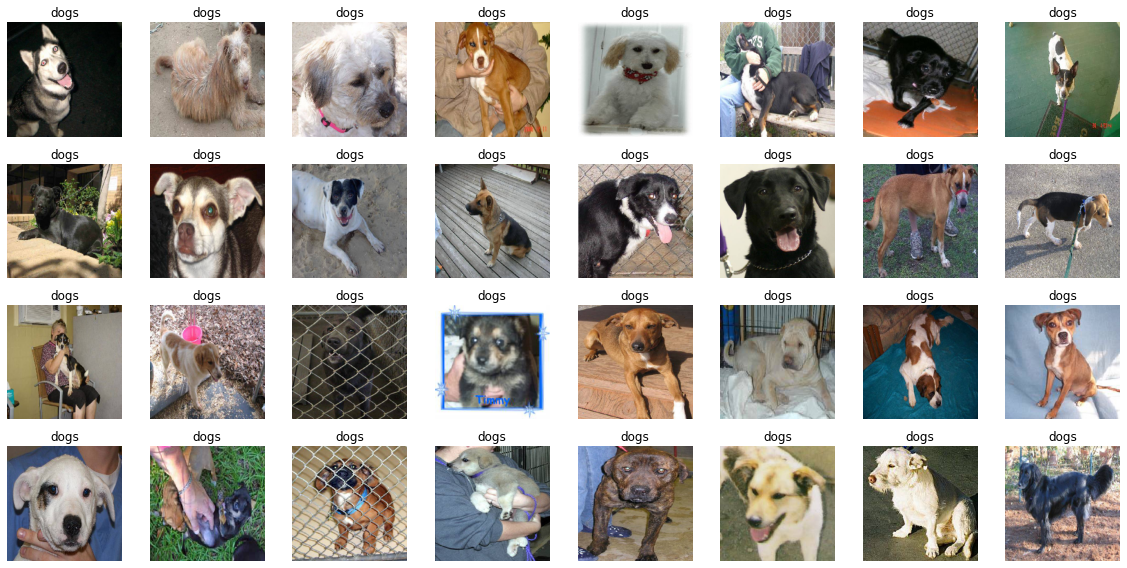

In [9]:
class_labels = ["cats", "dogs"]
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize=(16, 8))

for i in range(32):
    ax = plt.subplot(4, 8, i+1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(np.int)])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [10]:
def set_build_model():
    input_tensor = Input(shape = (224, 224, 3))
    x = BatchNormalization()(input_tensor)
    x = Conv2D(32, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(2, 2)(x)

    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(2, 2)(x)
 
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(2, 2)(x)

    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(rate=0.5)(x)
    output = Dense(1, activation="sigmoid", name="output")(x)

    model = Model(inputs=input_tensor, outputs=output)

    model.summary()

    return model 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     128   

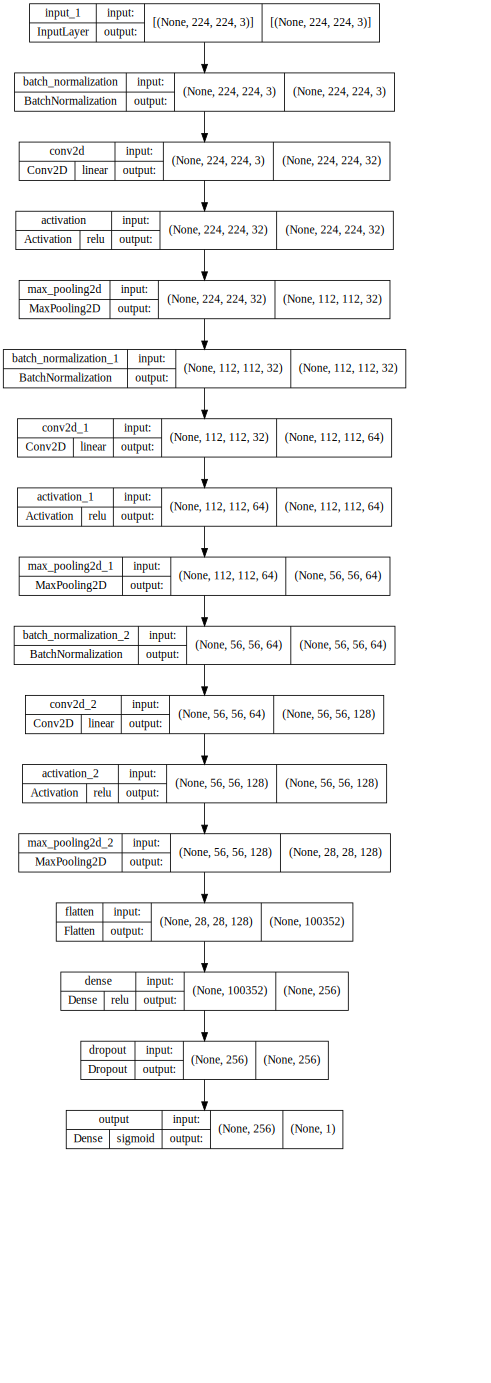

In [11]:
model = set_build_model()
SVG(model_to_dot(model, show_shapes=True, show_layer_activations=True, dpi=60).create(prog="dot", format="svg"))

In [12]:
model.compile(optimizer=Adam(lr=0.001), 
              loss="binary_crossentropy", 
              metrics=["accuracy"])

history = model.fit(train_gen, validation_data = test_gen, epochs=20) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
126/126 [==============================] - 32s 149ms/step - loss: 0.0101 - accuracy: 0.9950 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
126/126 [==============================] - 18s 141ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
126/126 [==============================] - 18s 141ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
126/126 [==============================] - 18s 140ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
126/126 [==============================] - 19s 148ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
126/126 [==============================] - 18s 140ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
126/126 [==============================] - 18s 140ms/step - loss: 0.0000e+0

In [21]:
def get_show_plot_acc_loss(hitsory, epochs):
    loss, val_loss = history.history["loss"], history.history["val_loss"]
    acc, val_acc = history.history["accuracy"], history.history["val_accuracy"]

    figure, axes = plt.subplots(1,2, figsize=(12, 4))
    axes[0].plot(range(1, epochs+1), loss, label="Training")
    axes[0].plot(range(1, epochs+1), val_loss, label="Validation")
    axes[0].legend(loc="best")
    axes[0].set_title("loss")

    axes[1].plot(range(1, epochs+1), acc, label="Training")
    axes[1].plot(range(1, epochs+1), val_acc, label="Validation")
    axes[1].legend(loc="best")
    axes[1].set_title("acc")

    plt.show()


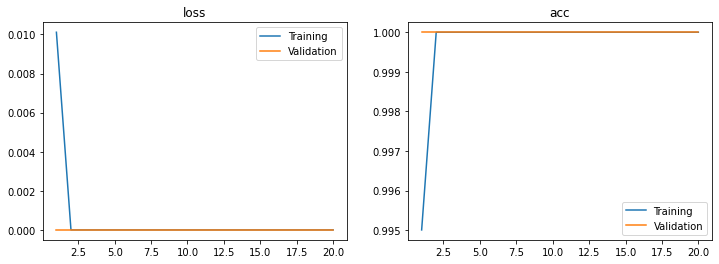

In [22]:
get_show_plot_acc_loss(history, 20)